In [ ]:
# install dependencies
# !pip install pandas numpy matplotlib seaborn plotly  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### EDA

In [2]:
def inspect(df):
    print(df.info())
    print()
    display(df.head())

In [3]:
# load tables
meals = pd.read_csv('./data/meal_info.csv')
fulf_ctr = pd.read_csv('./data/fulfilment_center_info.csv')
demand_weekly = pd.read_csv('./data/train_file.csv')

In [4]:
# inspect frames

inspect(meals)

print()
print('-'*70)

inspect(fulf_ctr)

print()
print('-'*70)

inspect(demand_weekly)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None



,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian



----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None



,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6



----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None



,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [12]:
meals.nunique()

# 51 different meals
# 14 different products
# only 4 cuisines

meal_id     51
category    14
cuisine      4
dtype: int64

In [13]:
# so what different categories of food are there & cuisine
print(f'Food categories: \n{meals.category.unique()} \n\nFood cuisines: \n{meals.cuisine.unique()}')

Food categories: 
['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood'] 

Food cuisines: 
['Thai' 'Indian' 'Italian' 'Continental']


In [14]:
# how many fulfilment center types are there
fulf_ctr.center_type.unique()

# how many fulfiment centers are in our data
len(fulf_ctr.center_id.unique())

# how many cities are in our data
len(fulf_ctr.city_code.unique())


print(f'''We have three types of fulfilment centers:
{fulf_ctr.center_type.unique()}

Total fulfilment centers in our data: 
{len(fulf_ctr.center_id.unique())} 

Total cities in our data: 
{len(fulf_ctr.city_code.unique())}

Total regions in our data:
{len(fulf_ctr.region_code.unique())}''')

We have three types of fulfilment centers:
['TYPE_A' 'TYPE_B' 'TYPE_C']

Total fulfilment centers in our data: 
77 

Total cities in our data: 
51

Total regions in our data:
8


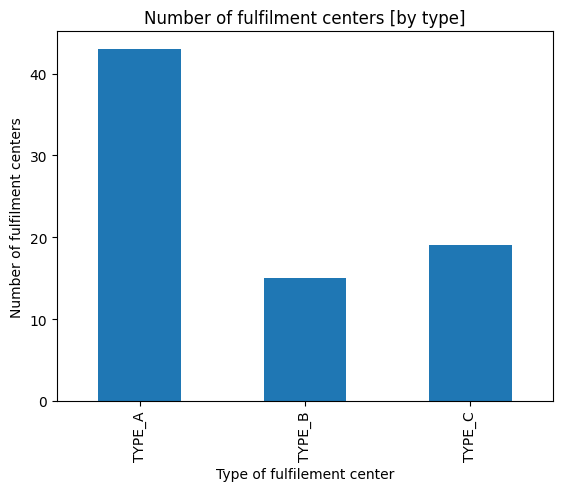

In [15]:
# whats the distribution of fulfilment centers wrt to their types | number of fulfilment centers for each type present in data
fulf_ctr.groupby(by='center_type').count()['center_id'].plot(kind='bar')
plt.xlabel('Type of fulfilement center')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by type]');

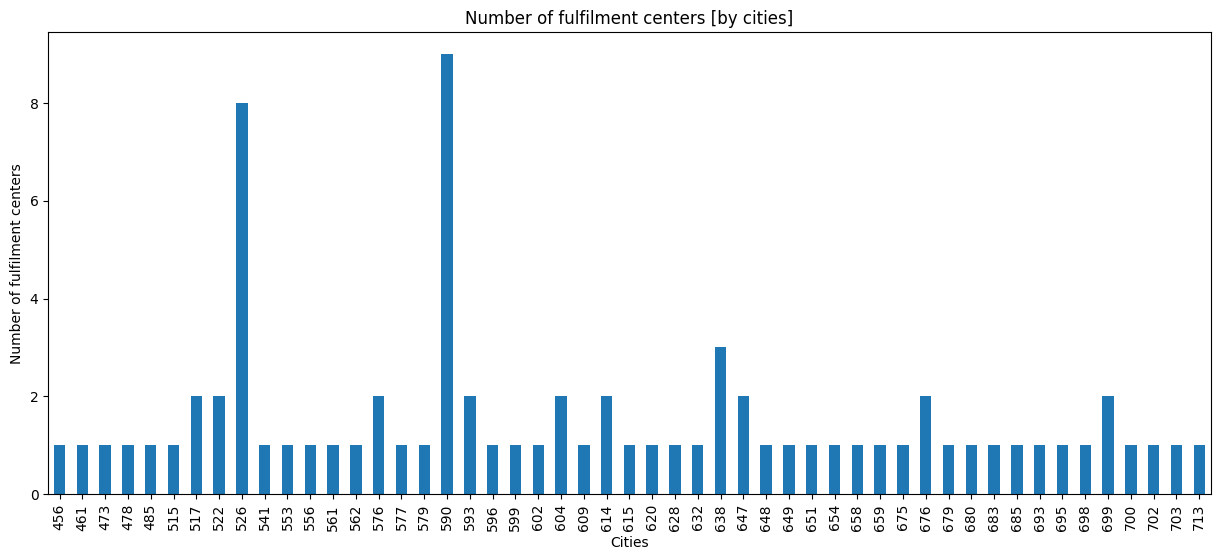

In [16]:
# fulfilment centers present [by city] | so where are these fulfilment centers really located
plt.figure(figsize=(15, 6))
fulf_ctr.groupby(by='city_code').count()['center_id'].plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by cities]');

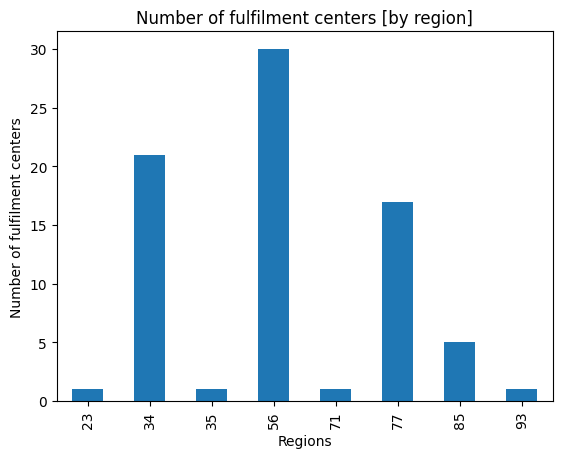

In [17]:
# can we visualize the number of fulfilment centers across each region
fulf_ctr.groupby(by='region_code').count()['center_id'].plot(kind='bar')
plt.xlabel('Regions')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by region]');

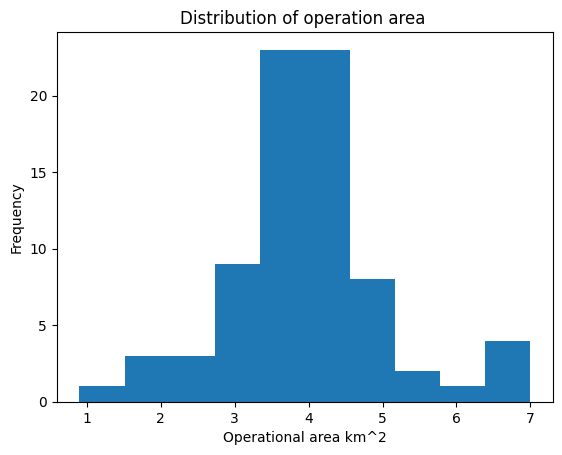

In [19]:
# whats the distribuition of operational area
# plt.figure(figsize=(12, 6))
plt.hist(fulf_ctr.op_area)
plt.xlabel('Operational area km^2')
plt.ylabel('Frequency')
plt.title('Distribution of operation area ');

In [5]:
# join the weekly demand data with the fulf center and meal table on the center & meal id respectively
dem_weekly_fulf_ctr = pd.merge(demand_weekly, fulf_ctr, on='center_id', how='inner')

full_data = pd.merge(dem_weekly_fulf_ctr, meals, on='meal_id', how='inner')
inspect(full_data) # summary on full data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


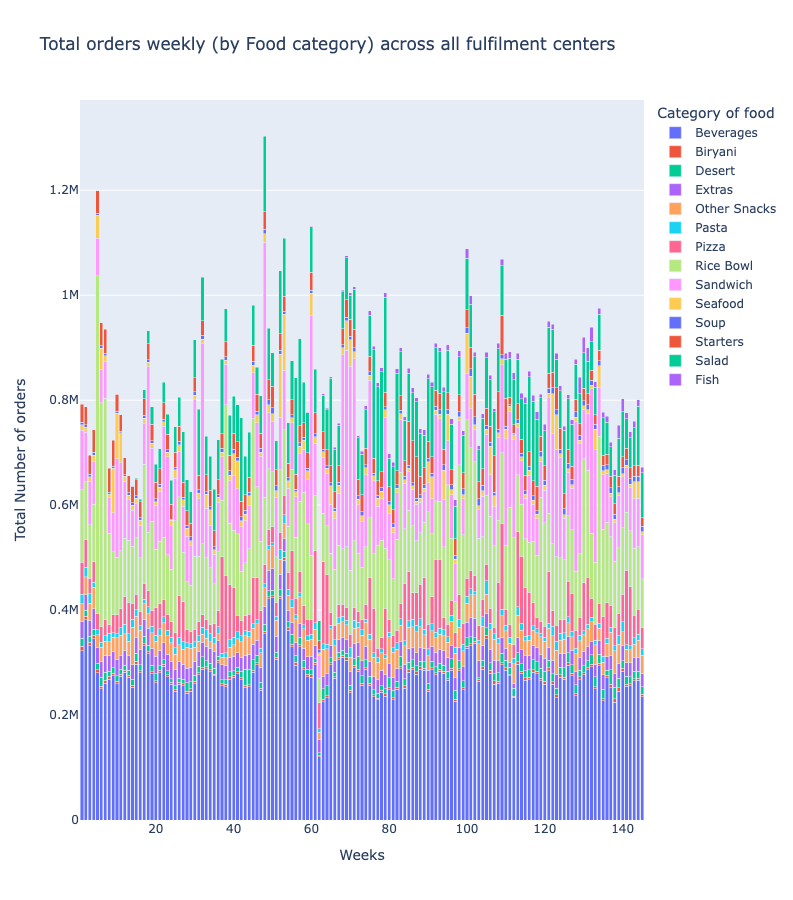

In [26]:
# can we get a sense of the most demanded category of food each week across all fulfilment centers?

    # Group by 'week' and 'category', and compute the sum of 'num_orders'
result = full_data.groupby(['week', 'category']).agg({'num_orders': 'sum'}).reset_index()
fig = px.bar(result, x='week', y='num_orders', color='category',
             title='Total orders weekly (by Food category) across all fulfilment centers',
             labels={'num_orders': 'Total Number of orders', 'week': 'Weeks', 'category': 'Category of food'},
             barmode='stack')
# Set the size of the figure
fig.update_layout(height=900, width=1100)

# Show plot
fig.show();

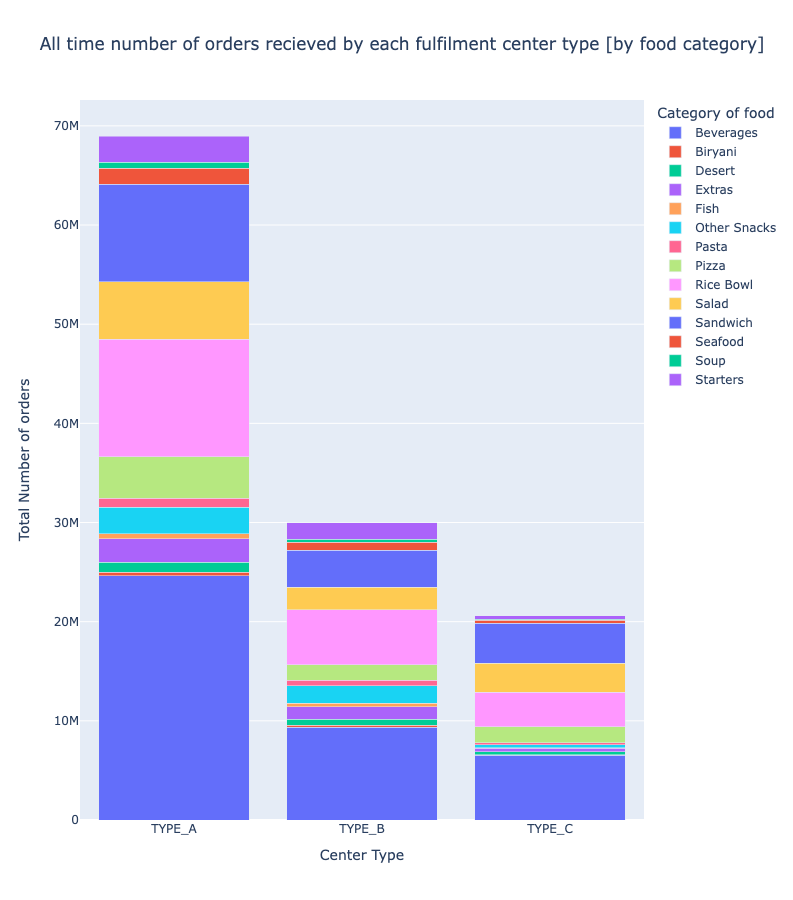

In [28]:
# Lets visualize the distribution of meals that was ordered over the course of 146 weeks from each fulfilment center

result = full_data.groupby(['center_type', 'category']).agg({'num_orders': 'sum'}).reset_index()

fig = px.bar(result, x='center_type', y='num_orders', color='category',
             title='All time number of orders recieved by each fulfilment center type [by food category]',
             labels={'num_orders': 'Total Number of orders', 'center_type': 'Center Type', 'category': 'Category of food'},
             barmode='stack')

# Set the size of the figure
fig.update_layout(height=900, width=1100)

# Show plot
fig.show();

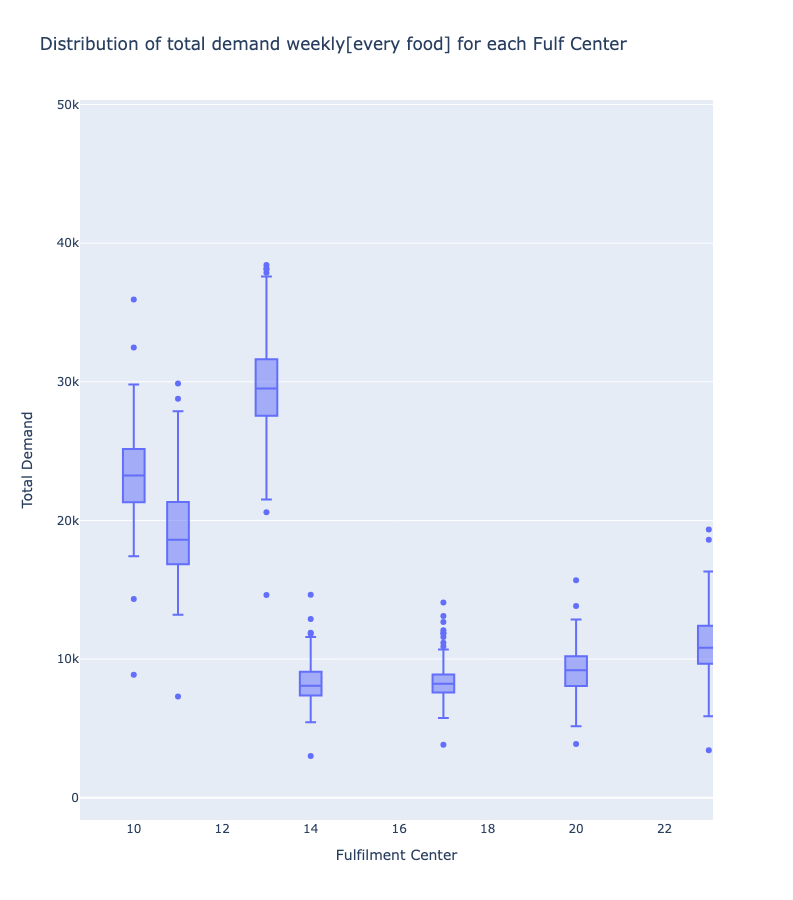

In [29]:
# distribution of total number of orders (for every meal category) each fullfilment center saw each week

result =  full_data.groupby(by=['center_id', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize
fig = px.box(result, x='center_id', y='num_orders', 
             title='Distribution of total demand weekly[every food] for each Fulf Center',
             labels={'num_orders':'Total Demand', 'center_id': 'Fulfilment Center'}
            )
    # Set the size of the figure
fig.update_layout(height=900, width=1100)

fig.show();

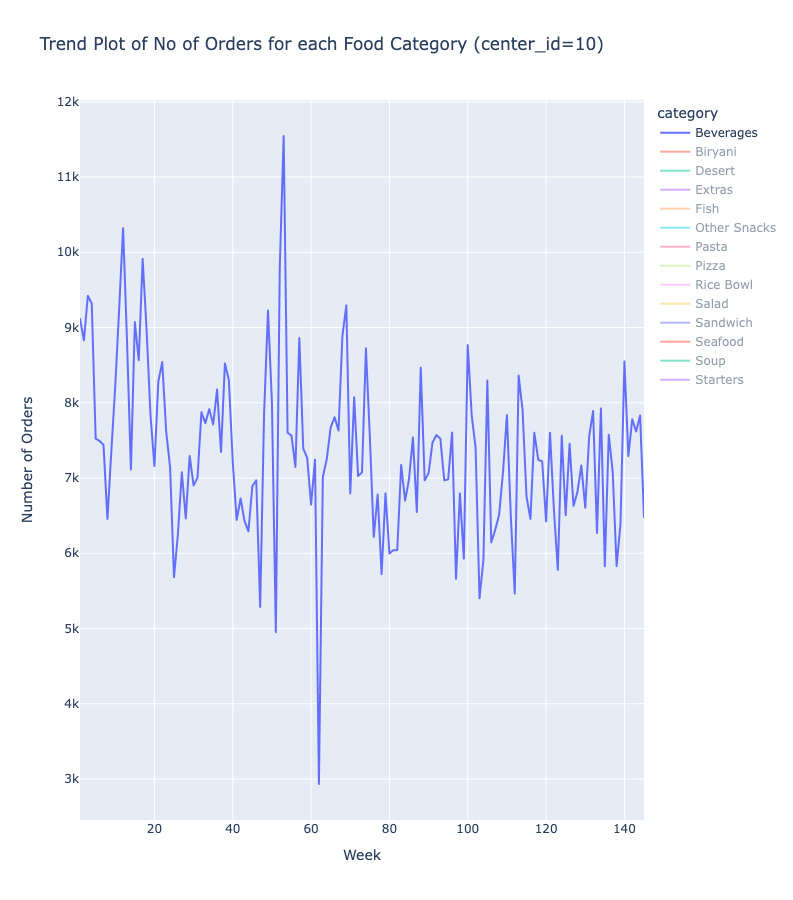

In [31]:
# TREND PLOTS!!!! TREND PLOTS!!!! TREND PLOTS!!!! - what we are really working with

# We want to visualize the trend of the total number of orders for each food category on a weekly basis for one center
# We start by visualizing the activity in one fulfilment center

ctr_10 = full_data[full_data.center_id == 10]
result = ctr_10.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=10)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=900, width=1100)

# Show the plot
fig.show();


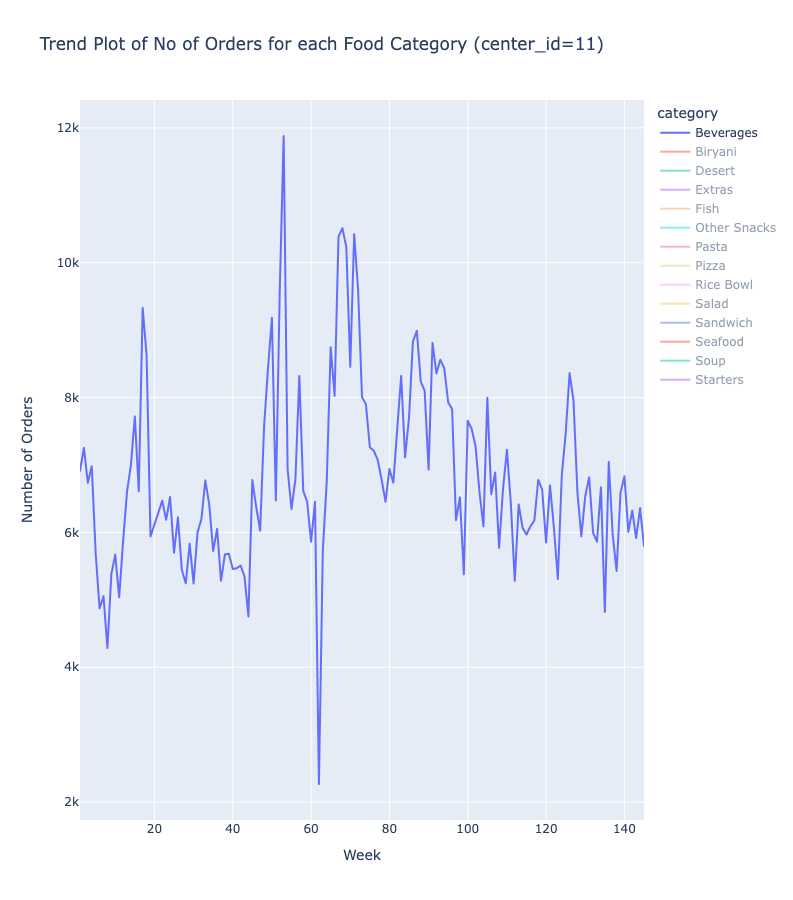

In [32]:
# Lets visualize one more center

ctr_11 = full_data[full_data.center_id == 11]
result = ctr_11.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=11)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=900, width=1100)

# Show the plot
fig.show();

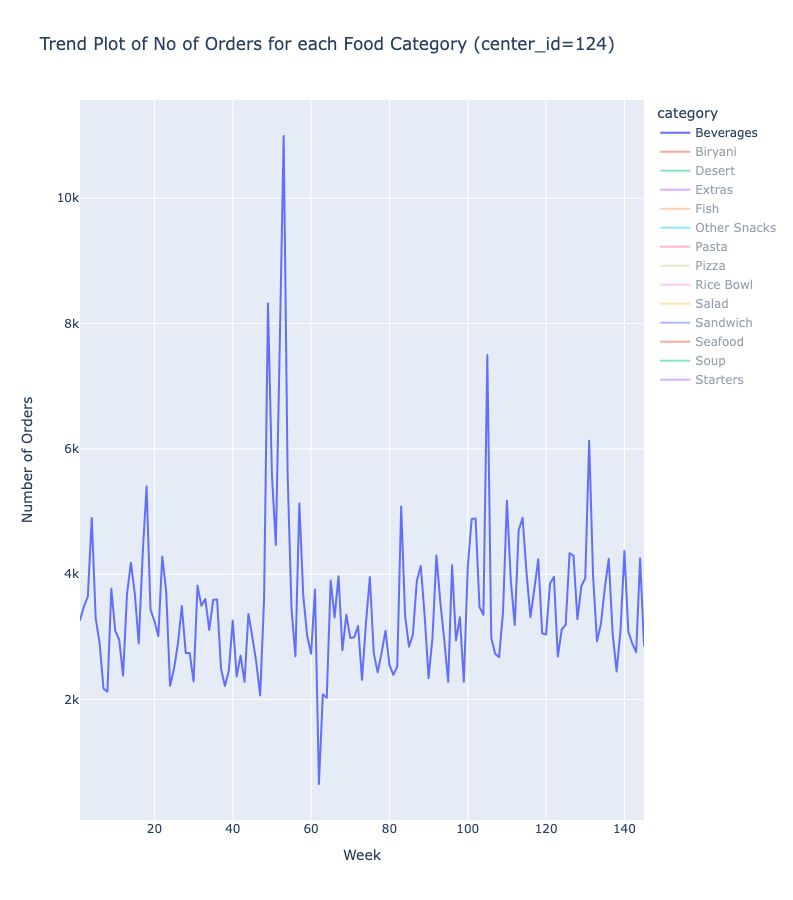

In [36]:
# and one more for a type C centers
ctr_124 = full_data[full_data.center_id == 124]
result = ctr_124.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=124)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=900, width=1100)

# Show the plot
fig.show();

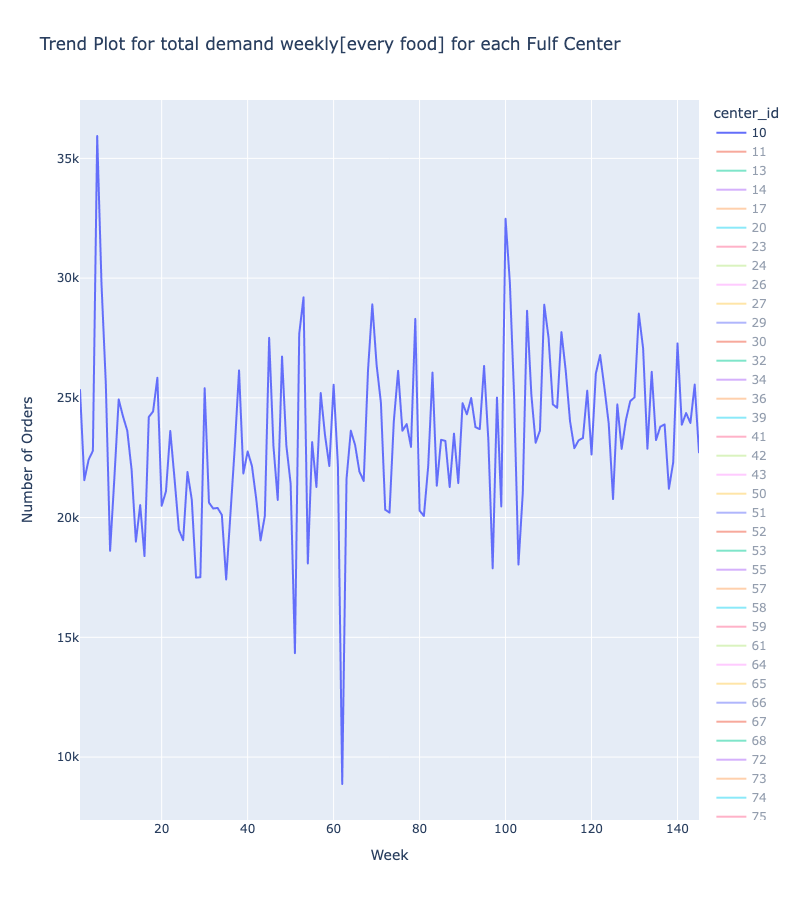

In [35]:
# total demand each week in each center

result = full_data.groupby(by=['center_id', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize
fig = px.line(result, x='week', y='num_orders', color='center_id',
              title='Trend Plot for total demand weekly[every food] for each Fulf Center',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=900, width=1100)

    # Show the plot
fig.show();

### MODEL DEVELOPMENT

In [6]:
# import useful dependencies
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

#### Training

##### Lets conduct stationarity tests and visualize results

In [7]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    '''
    Function perform stationarity test on a time series
    p-value < .05 stationary
    p-value >= 0.05 not stationary
    '''
    result = adfuller(series)
    # print('ADF Statistic: %f' % result[0])
    # print('p-value: %f' % result[1])
    return np.round(result[1], 3)

# perform_adf_test(result.loc[(10, 'Rice Bowl')].squeeze())

# perform stationarity test and visualize results
# number of orders for each food category for each center on a weekly basis
result = full_data.groupby(['center_id', 'category', 'week']).agg({'num_orders':'sum'})

# get list of both centers & food categories
food_categories = list(full_data.category.unique())

center_ids = sorted(list(full_data.center_id.unique()))

# instantiate df
stationarity_1_df  = pd.DataFrame(index=center_ids, columns=food_categories, dtype='float')

# perform stationarity test for food category ts for each center
for center in center_ids:
    
    # get food categories present in the center
    center_food_categories = result.loc[(center)].reset_index().category.unique()
    
    for food_category in food_categories:
        
        # check if food category was sold in that center
        if food_category in center_food_categories:
            
            # slice into data to get a timeseries
            resulting_ts = result.loc[(center, food_category)]
            # print(center, food_category) # DEBUG
        
            # validate ts first to meet alf test criteria and usefulness
            if result.loc[(center, food_category)].size > 30: # number of weeks present should be greater than 30
                p_val = perform_adf_test(resulting_ts.squeeze())
                
                # store result
                stationarity_1_df.loc[center, food_category] = p_val

inspect(stationarity_1_df)

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 10 to 186
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Beverages     77 non-null     float64
 1   Rice Bowl     77 non-null     float64
 2   Starters      77 non-null     float64
 3   Pasta         77 non-null     float64
 4   Sandwich      77 non-null     float64
 5   Biryani       76 non-null     float64
 6   Extras        36 non-null     float64
 7   Pizza         77 non-null     float64
 8   Seafood       76 non-null     float64
 9   Other Snacks  77 non-null     float64
 10  Desert        77 non-null     float64
 11  Salad         77 non-null     float64
 12  Fish          61 non-null     float64
 13  Soup          33 non-null     float64
dtypes: float64(14)
memory usage: 11.1 KB
None



,Beverages,Rice Bowl,Starters,Pasta,Sandwich,Biryani,Extras,Pizza,Seafood,Other Snacks,Desert,Salad,Fish,Soup
10,0.001,0.0,0.000,0.0,0.0,0.0,0.390,0.0,0.0,0.00,0.00,0.0,0.000,0.140
11,0.468,0.0,0.001,0.0,0.0,0.0,0.211,0.0,0.0,0.02,0.00,0.0,0.000,0.435
13,0.000,0.0,0.000,0.0,0.0,0.0,0.540,0.0,0.0,0.00,0.00,0.0,0.000,0.039
14,0.000,0.0,0.003,0.0,0.0,0.0,0.435,0.0,0.0,0.00,0.04,0.0,0.000,0.769
17,0.017,0.0,0.004,0.0,0.0,0.0,0.012,0.0,0.0,0.00,0.00,0.0,0.118,0.001


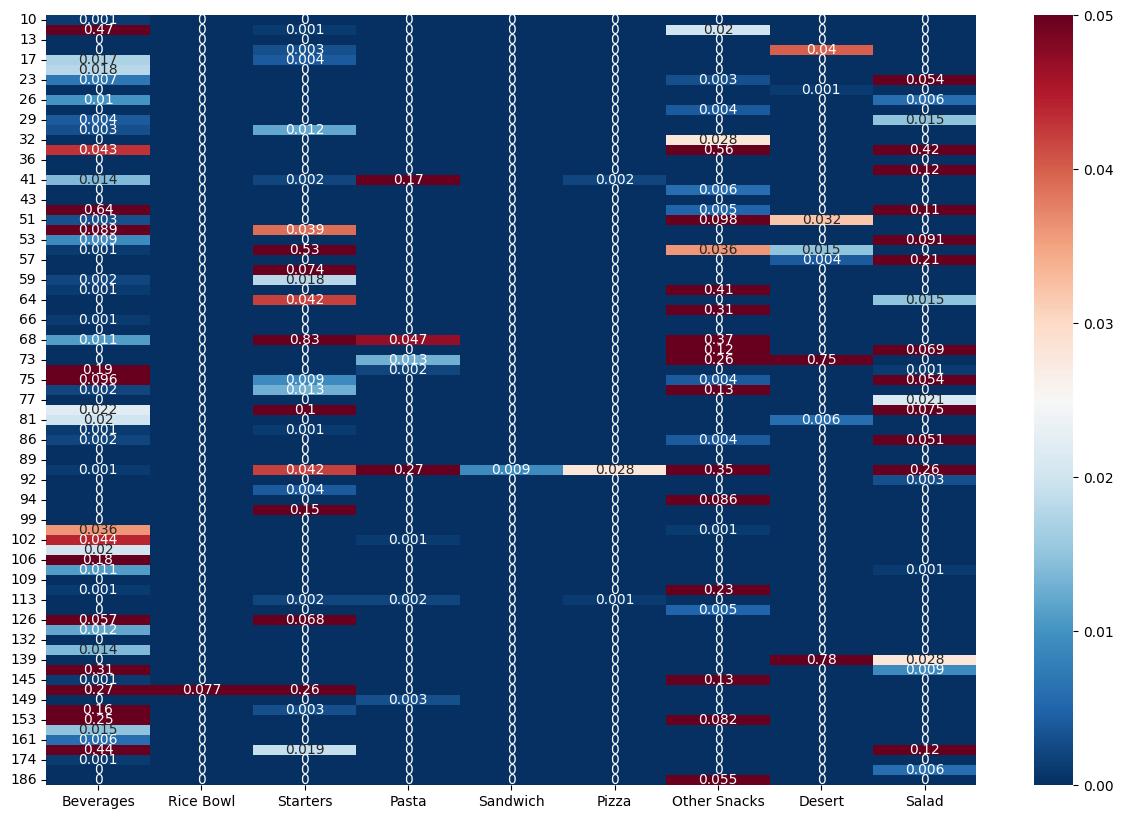

In [40]:
# Lets visualize the stationarity df to know which timeseries passed the test (p-val < 0.05)
stationarity_1_df.dropna(axis=1) # drop food categories that dont have tests across all centers
plt.figure(figsize=(15, 10))
sns.heatmap(stationarity_1_df.dropna(axis=1), vmin=0, vmax=0.05, cmap= 'RdBu_r', annot=True);

##### Time series model building

In [8]:
categories = list(stationarity_1_df.dropna(axis=1).columns)
print(f'Selected food category time series in each center:{categories}')
print()

result # original aggregated dataframe


Selected food category time series in each center:['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich', 'Pizza', 'Other Snacks', 'Desert', 'Salad']



num_orders
center_id category  week            
10        Beverages 1           9116
                    2           8830
                    3           9421
                    4           9321
                    5           7523
...                              ...
186       Starters  141          233
                    142          178
                    143          149
                    144          121
                    145           94

[133003 rows x 1 columns]

In [47]:
# select relevant time series 
main = result.loc[(slice(None), categories), :]
main

num_orders
center_id category  week            
10        Beverages 1           9116
                    2           8830
                    3           9421
                    4           9321
                    5           7523
...                              ...
186       Salad     141          418
                    142          380
                    143          731
                    144          729
                    145          485

[98310 rows x 1 columns]

#### Evaluation

In [41]:
result

num_orders
center_id category  week            
10        Beverages 1           9116
                    2           8830
                    3           9421
                    4           9321
                    5           7523
...                              ...
186       Starters  141          233
                    142          178
                    143          149
                    144          121
                    145           94

[133003 rows x 1 columns]